In [14]:
from quantrocket.license import get_license_profile
get_license_profile(force_refresh=True)

{'licensekey': '999f........b947', 'software_license': {}}

In [15]:
!quantrocket license get --force-refresh

licensekey: 999f........b947
software_license: {}


In [16]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [1]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [ ]:
# Part - 2

In [ ]:
#get_securities function loads them into a pandas DataFrame:

In [27]:
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [2]:
securities.shape
securities.index

NameError: name 'securities' is not defined

In [30]:
from quantrocket.master import create_universe
create_universe("usstock-free", sids=securities.index.tolist())

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/master/universes/usstock-free?sids=FIBBG000B9XRY4&sids=FIBBG000BFWKC0&sids=FIBBG000BKZB36&sids=FIBBG000BMHYD1&sids=FIBBG000BPH459&sids=FIBBG000CK38G3&sids=FIBBG000GZQ728&sids=FIBBG00B3T3HD3', {'status': 'error', 'msg': "universe 'usstock-free' already exists, please indicate whether to replace it or append to it"})

In [ ]:
#Filter securities
#As a demonstration, we could also pare down the securities to create a universe from a subset of securities. For example, we might limit the universe to currently listed securities:

In [21]:

filtered_securities = securities[securities.Delisted==False]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False


In [22]:
create_universe("usstock-free-active", sids=filtered_securities.index.tolist())

{'code': 'usstock-free-active',
 'provided': 6,
 'inserted': 6,
 'total_after_insert': 6}

In [23]:
#PART-3 : Researching the Momentum Factor

In [103]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="2023-01-01", end_date="2023-12-30",fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BKZB36  FIBBG000BMHYD1  \
Field Date                                                         
Close 2023-01-03        124.2163        305.5299        171.6388   
      2023-01-04        125.4975        309.2243        173.5075   
      2023-01-05        124.1666        305.1043        172.2264   
      2023-01-06        128.7352        307.0966        173.6231   
      2023-01-09        129.2616        307.3674        169.1248   

Sid               FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Field Date                                                        
Close 2023-01-03        237.0360        102.0452         43.8958  
      2023-01-04        226.6673        102.3422         44.4374  
      2023-01-05        219.9494        104.6320         44.7919  
      2023-01-06        222.5416        105.8967         45.6485  
      2023-01-09        224.7083        103.9230         49.4985

In [187]:
sample = prices['FIBBG000B9XRY4']

In [188]:
import pandas as pd

In [189]:
df = pd.DataFrame(sample)


In [190]:
df

FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616
...                          ...
      2023-12-22        193.3533
      2023-12-26        192.8040
      2023-12-27        192.9038
      2023-12-28        193.3333
      2023-12-29        192.2846

[250 rows x 1 columns]

In [191]:
df.index

MultiIndex([('Close', '2023-01-03'),
            ('Close', '2023-01-04'),
            ('Close', '2023-01-05'),
            ('Close', '2023-01-06'),
            ('Close', '2023-01-09'),
            ('Close', '2023-01-10'),
            ('Close', '2023-01-11'),
            ('Close', '2023-01-12'),
            ('Close', '2023-01-13'),
            ('Close', '2023-01-17'),
            ...
            ('Close', '2023-12-15'),
            ('Close', '2023-12-18'),
            ('Close', '2023-12-19'),
            ('Close', '2023-12-20'),
            ('Close', '2023-12-21'),
            ('Close', '2023-12-22'),
            ('Close', '2023-12-26'),
            ('Close', '2023-12-27'),
            ('Close', '2023-12-28'),
            ('Close', '2023-12-29')],
           names=['Field', 'Date'], length=250)

In [317]:
data = pd.DataFrame(df)

In [318]:
df['FIBBG000B9XRY4']['Close'].shape


(250,)

In [319]:
temp=[]
for i in range(0,250):
    temp.append(df['FIBBG000B9XRY4']['Close'][i])
    
    
temp

data['prices'] = temp

In [320]:
data.head()

FIBBG000B9XRY4    prices
Field Date                                
Close 2023-01-03        124.2163  124.2163
      2023-01-04        125.4975  125.4975
      2023-01-05        124.1666  124.1666
      2023-01-06        128.7352  128.7352
      2023-01-09        129.2616  129.2616

In [321]:
data.columns

Index(['FIBBG000B9XRY4', 'prices'], dtype='object')

In [322]:
data = data.drop(['FIBBG000B9XRY4'],axis=1)


In [323]:
data.columns

Index(['prices'], dtype='object')

In [324]:
data.head()

prices
Field Date                
Close 2023-01-03  124.2163
      2023-01-04  125.4975
      2023-01-05  124.1666
      2023-01-06  128.7352
      2023-01-09  129.2616

In [325]:
data = data.reset_index()


In [326]:
data.head()

,Field,Date,prices
0,Close,2023-01-03,124.2163
1,Close,2023-01-04,125.4975
2,Close,2023-01-05,124.1666
3,Close,2023-01-06,128.7352
4,Close,2023-01-09,129.2616


In [327]:
data = data.drop(['Field'],axis=1)

In [328]:
data.head()

,Date,prices
0,2023-01-03,124.2163
1,2023-01-04,125.4975
2,2023-01-05,124.1666
3,2023-01-06,128.7352
4,2023-01-09,129.2616


In [329]:
data.shape

(250, 2)

In [330]:
#Data cleaning

In [331]:
data.isna().count

<bound method DataFrame.count of       Date  prices
0    False   False
1    False   False
2    False   False
3    False   False
4    False   False
..     ...     ...
245  False   False
246  False   False
247  False   False
248  False   False
249  False   False

[250 rows x 2 columns]>

Text(0, 0.5, 'Prices')

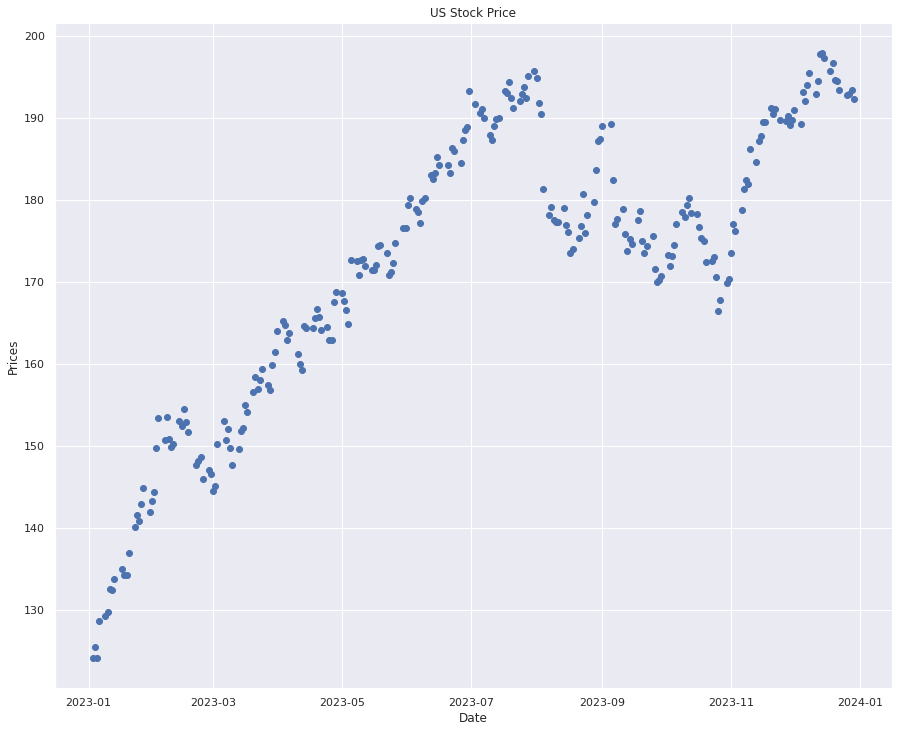

In [332]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.scatter(data.Date,data.prices)
plt.title('US Stock Price')
plt.xlabel('Date')
plt.ylabel('Prices')

In [333]:
data.head()

,Date,prices
0,2023-01-03,124.2163
1,2023-01-04,125.4975
2,2023-01-05,124.1666
3,2023-01-06,128.7352
4,2023-01-09,129.2616


In [334]:
data[data['Date'] == '2023-01-03'].prices

0    124.2163
Name: prices, dtype: float64

In [335]:
data.prices.iloc[5]

129.8377

In [336]:
days = data.shape[0]

In [353]:
returns_on_data=[]
classification=[]
category=[]
for i in range(0,days):
    if i == 0:
        # for the 1st day, I assumed it to be flat i,e 0
        returns_on_data.append(0)
        classification.append(0)
        category.append("Flat")
    else:
        pd1 = df.prices.iloc[i]
        pd0 = df.prices.iloc[i-1]
        value = ((pd1 - pd0)/pd0)*100
        returns_on_data.append(value)
        if value >=0.1:
            print(value," bull\t","\t+1")
            classification.append(1)
            category.append("Bull")
        elif value > -0.1 and value <0.1:
            print(value," flat\t","\t0")
            classification.append(0)
            category.append("Flat")
        else:
            print(value," bare\t","\t-1")
            classification.append(-1)
            category.append("Bear")
        

1.031426632414585  bull	 	+1
-1.0604992131317355  bare	 	-1
3.6794113714960295  bull	 	+1
0.4089013727403191  bull	 	+1
0.44568533887869655  bull	 	+1
2.111174181304805  bull	 	+1
-0.05988891134932025  flat	 	0
1.0119291106223889  bull	 	+1
0.8755964202085723  bull	 	+1
-0.5369889069201903  bare	 	-1
0.04438252073355445  flat	 	0
1.9220420002873166  bull	 	+1
2.350051742181537  bull	 	+1
1.0063019633698222  bull	 	+1
-0.47005766577586383  bare	 	-1
1.4803568982417012  bull	 	+1
1.3683980824941604  bull	 	+1
-2.0078118369822358  bare	 	-1
0.9021016885186315  bull	 	+1
0.790062600702964  bull	 	+1
3.7062448550339946  bull	 	+1
2.4400078776691427  bull	 	+1
-1.7928852868838088  bare	 	-1
1.9244921672551711  bull	 	+1
-1.7652987348497062  bare	 	-1
-0.6911315390070449  bare	 	-1
0.2455949738454667  bull	 	+1
1.8807228899620585  bull	 	+1
-0.4225226944218683  bare	 	-1
1.390345345325651  bull	 	+1
-1.0429415689947228  bare	 	-1
-0.7546409634393456  bare	 	-1
-2.6679829524298553  bare	 	-1
0

In [338]:
data['classification'] = classification
data['returns_on_data'] = returns_on_data

In [354]:
data['category'] = category

In [339]:
data.classification

0      0
1      1
2     -1
3      1
4      1
      ..
245   -1
246   -1
247    0
248    1
249   -1
Name: classification, Length: 250, dtype: int64

Text(0, 0.5, 'Prices')

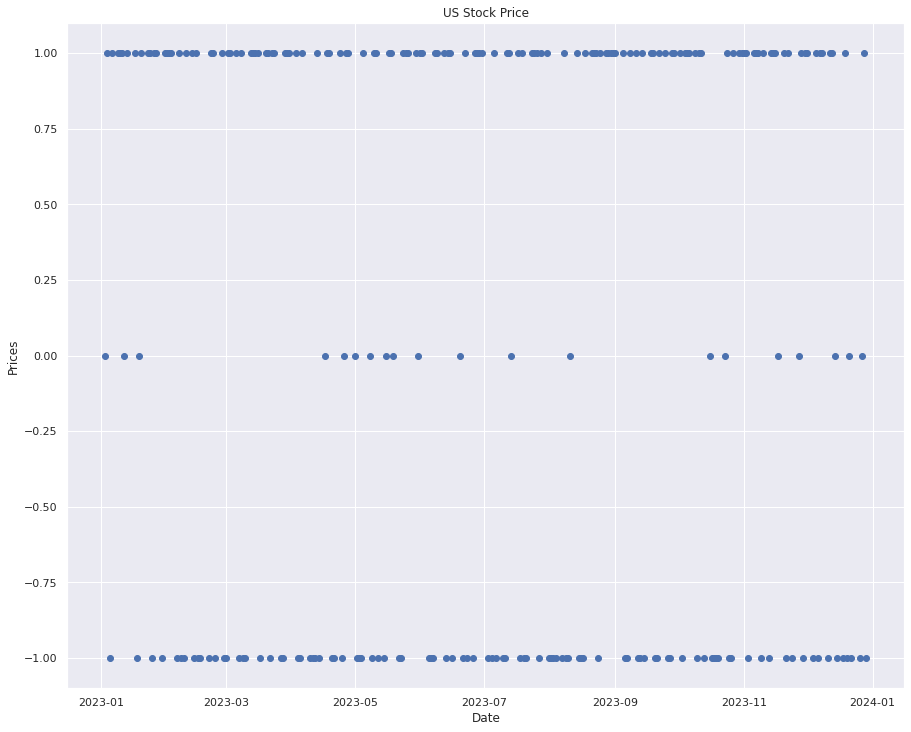

In [340]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.scatter(data.Date,data.classification)
plt.title('US Stock Price')
plt.xlabel('Date')
plt.ylabel('Prices')

No handles with labels found to put in legend.


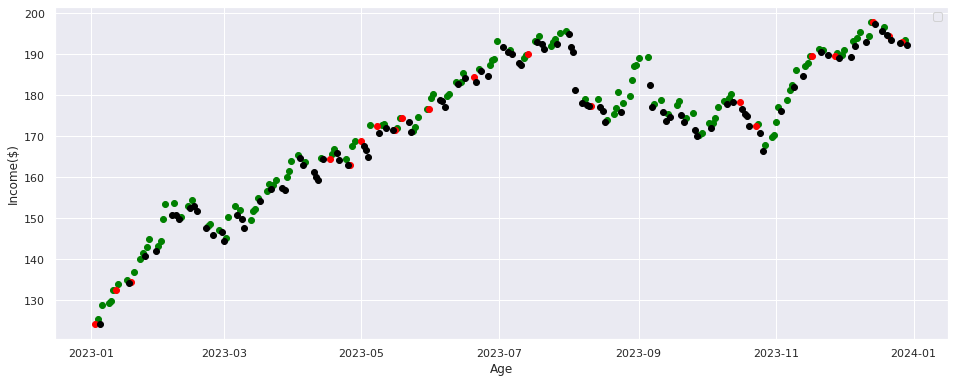

In [356]:
df1 = data[data.classification==1]
df2 = data[data.classification==0]
df3 = data[data.classification==-1]

plt.scatter(df1['Date'],df1['prices'],color='green')
plt.scatter(df2['Date'],df2['prices'],color='red')
plt.scatter(df3['Date'],df3['prices'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

No handles with labels found to put in legend.


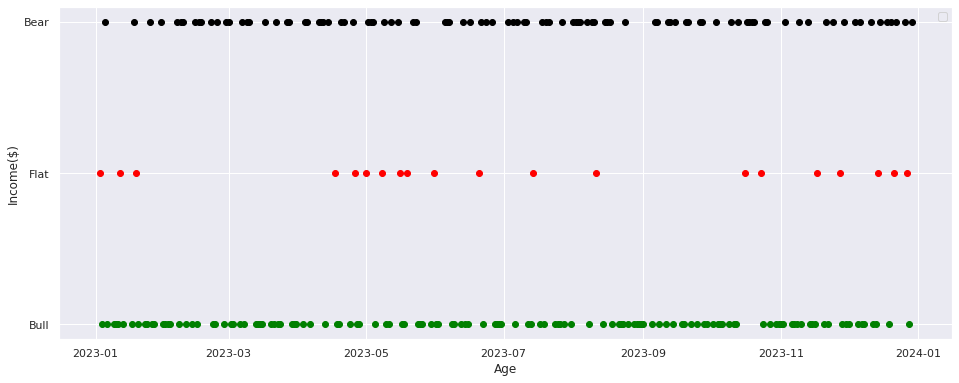

In [357]:
df1 = data[data.classification==1]
df2 = data[data.classification==0]
df3 = data[data.classification==-1]

plt.scatter(df1['Date'],df1['category'],color='green')
plt.scatter(df2['Date'],df2['category'],color='red')
plt.scatter(df3['Date'],df3['category'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

2

In [361]:
'''
ultimate goal is to maximize the profit
by finding the optimal paths

'''

'\nultimate goal is to maximize the profit\nby finding the optimal paths\n\n'

In [362]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

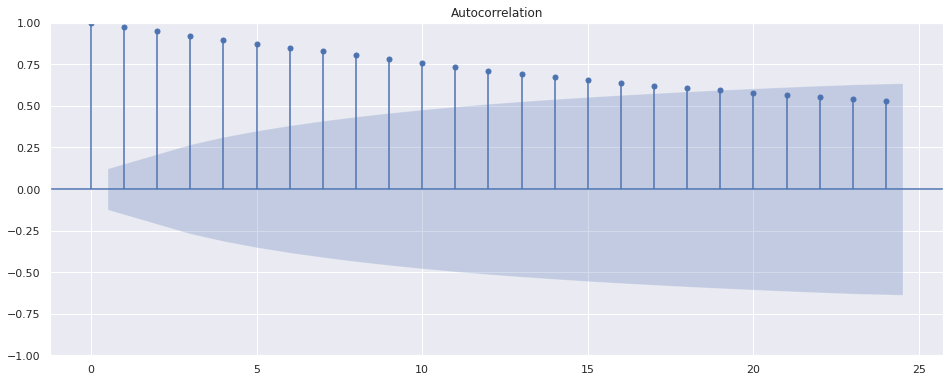

In [369]:
plot_acf(sample)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


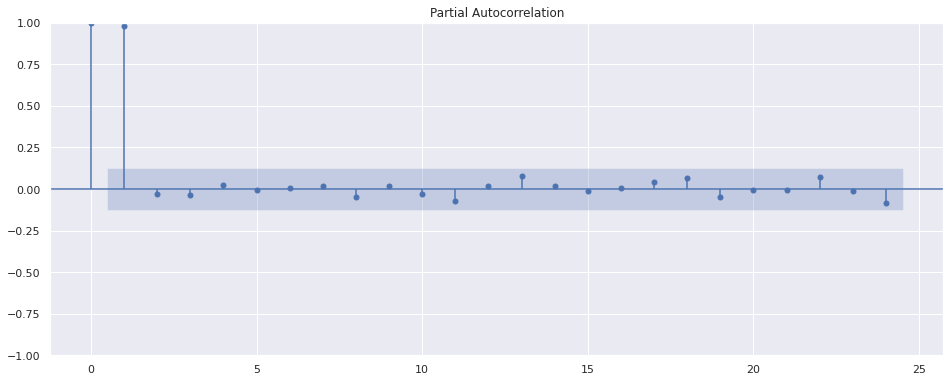

In [370]:
plot_pacf(sample)
plt.show()